# Principal Component Analysis

In [1]:
# Utilities

import numpy as np
from numpy import linalg as lg
import matplotlib.pyplot as plt

# Utilities
def show_images(images,t,r,c):
    fig, axes = plt.subplots(r, c, figsize=(2.2*c, 2.2*r), subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        image = images[i,:].reshape(64, 64)
        ax.imshow(image, cmap='gray')
        ax.set_title(t + str(i))
    plt.show
    
def show_images_tags(images,tags,t,r,c):
    fig, axes = plt.subplots(r, c, figsize=(2.2*c, 2.2*r), subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        image = images[i,:].reshape(64, 64)
        ax.imshow(image, cmap='gray')
        tag = 'R' if tags[i]==1 else 'B'
        ax.set_title(t + str(i) + '  (' + tag + ')')
    plt.show
    
def show_one_image(image):
    plt.figure(figsize=(1.5,1.5))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image.reshape(64, 64),cmap='gray')
    plt.show()

def show_1coord(p0,l0,tags):
    ans = np.array(['r' if tag == 1 else 'b' for tag in tags])
    plt.figure(figsize=(10,1))
    plt.xlabel(l0)
    plt.scatter(p0,np.zeros(p0.shape),c = ans)
    plt.gca().get_yaxis().set_visible(False)
    ax = plt.gca()
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.show()

size of X (20, 4096)
size of tags (20,)


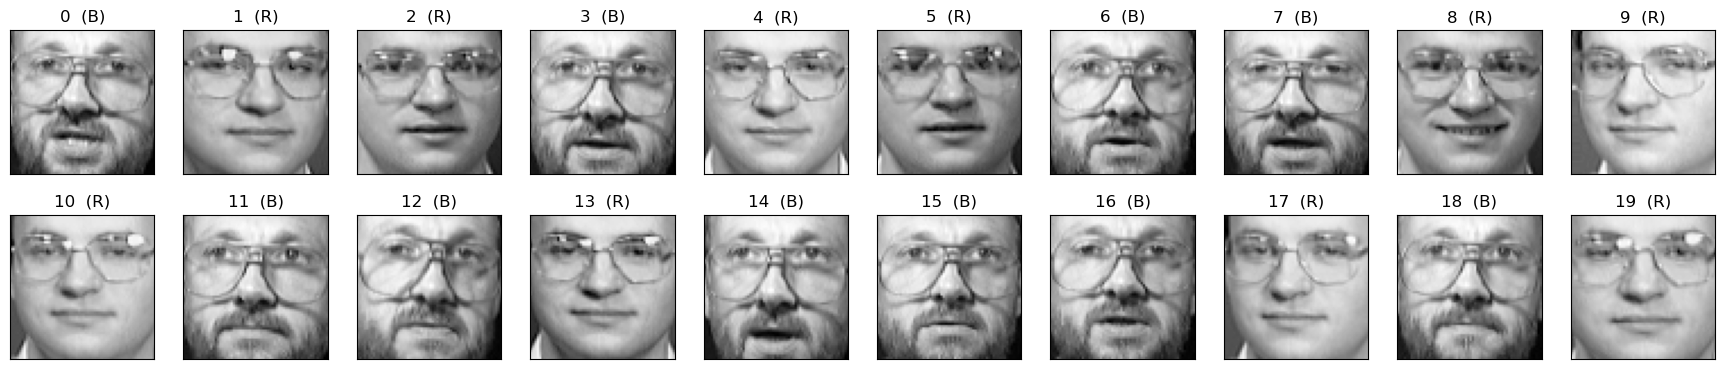

In [2]:
# Read Images
Xy = np.array(np.genfromtxt('faces.csv', delimiter=','))
d  = Xy.shape[1]-1
# better name should be: 
X  = Xy[:,:d]
     # 20 Images for two persons, 10 images per each person 
tags  = Xy[:,d]    
     # The classification done by a human eye.
     # This info is NOT used by the classification program below.
     # This info will be only used to check the suitableness of natural coordinate system for classification. 
print('size of X',X.shape)
print('size of tags',tags.shape)
show_images_tags(X,tags,"",2,10)

# Classifiation using naive approach

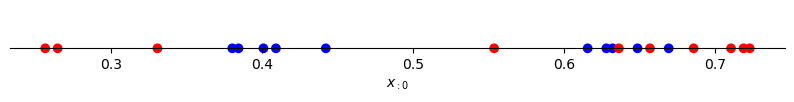

In [3]:
show_1coord(X[:,0], '$x_{:0}$', tags)

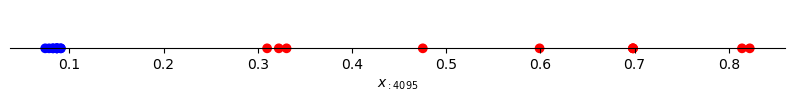

In [4]:
show_1coord(X[:,4095],'$x_{:4095}$',tags)

# Classifiation using PCA

## 1. Carry out PCA

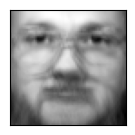

In [5]:
# Compute the mean image
c = X.mean(axis = 0, keepdims = True)
show_one_image(c)

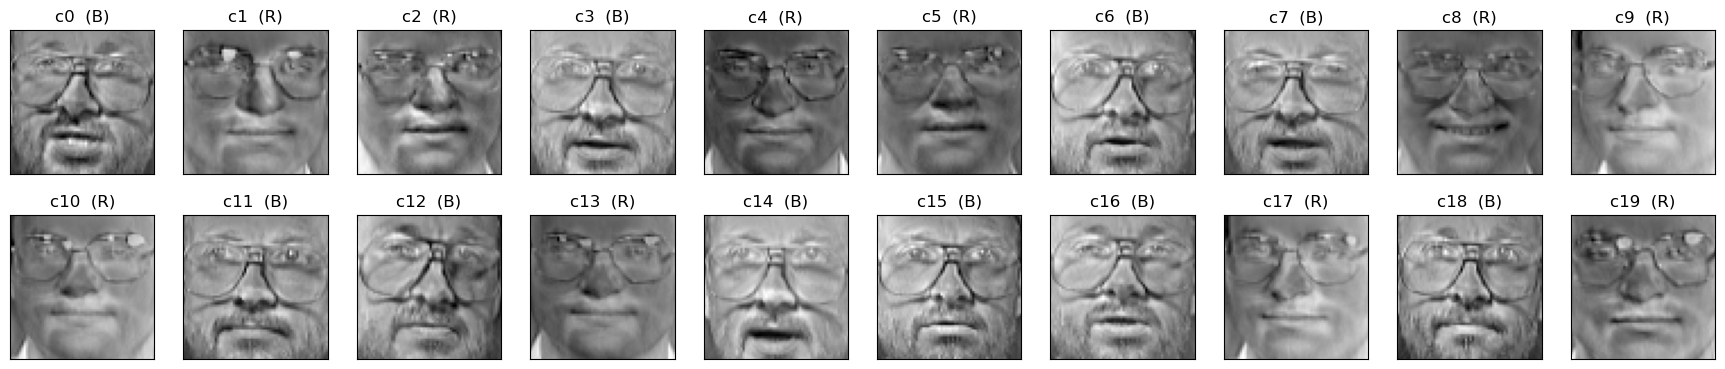

In [6]:
# Center the images
Xc = X-c
show_images_tags(Xc,tags,"c",2,10)

(4096, 4096)


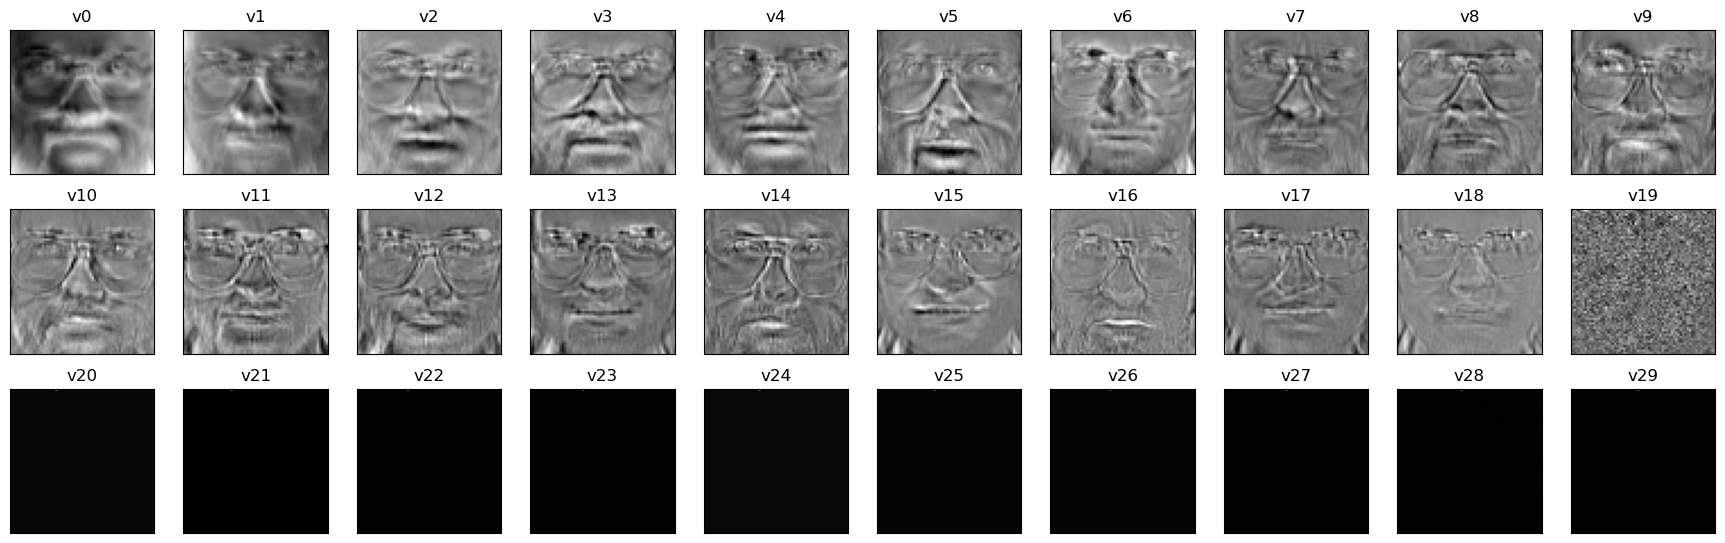

In [7]:
# Compute a "natural" coordinate system via SVD using  "Full" matrices
U, S, Vt = lg.svd(Xc, full_matrices=True)
V=Vt.T
print(V.shape)
show_images(Vt,"v", 3, 10)

## 2. Compute the projection of each centered image on the PC1

In [8]:
# Compute the natural coordinates for each centered image
B = V
(Xc @ B).shape
Xc @ B[:,0]

array([-5.1196209 ,  6.51989264,  1.84959776, -5.63872436,  7.51758064,
        2.55786823, -7.40414148, -5.66571939,  1.94719278,  8.19608239,
        7.87670249, -4.00949017, -7.42327278,  8.04126394, -4.89792626,
       -7.28053037, -6.64238071,  8.1269716 , -6.19843767,  7.64709162])

## 3. Classify using PC1

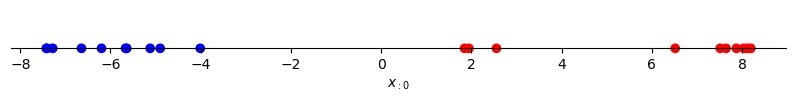

In [9]:
show_1coord(Xc @ B[:,0],'$x_{:0}$',tags)